In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [19]:
# ['Date','Close','Start','High','Low','Volume']
df=pd.read_csv('./dataset/주가데이터.csv')
df.drop(['전일종가'],axis=1,inplace=True)
df.columns = ['Date','Close','Start','High','Low','Volume']
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [20]:
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop(['Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Date'>

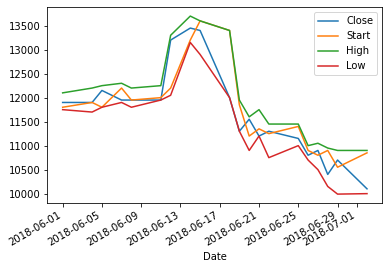

In [21]:
# 선그래프
df1.plot()

<AxesSubplot:xlabel='Date'>

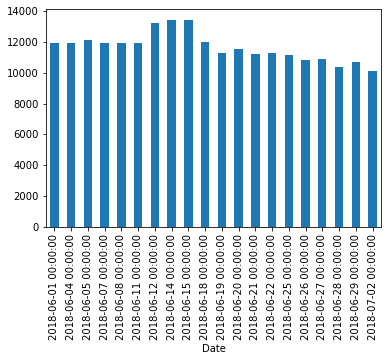

In [23]:
df2 = df1.sort_index()
df2.Close.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

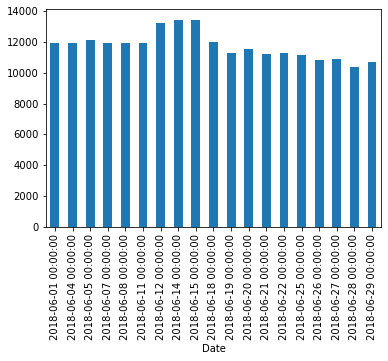

In [27]:
# Q. 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요
df2.loc['2018-06'].Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

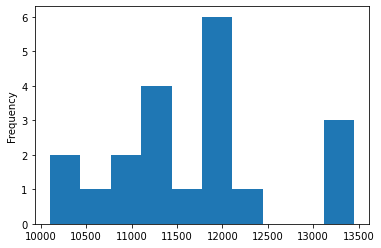

In [29]:
df2.Close.plot(kind='hist')

In [30]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

In [2]:
import seaborn as sns
sns.histplot(df.Volume, kde=True) # 확률 밀도 함수를 추가적으로 보여줌

AttributeError: 'DataFrame' object has no attribute 'Volume'

<AxesSubplot:xlabel='Close', ylabel='Volume'>

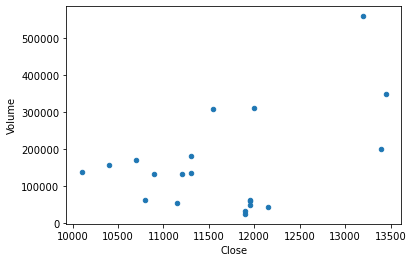

In [33]:
# 산점도
df.plot(x='Close',y='Volume',kind='scatter')

In [35]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

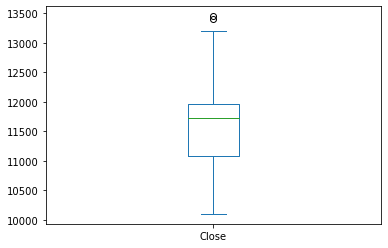

In [34]:
# Box Plot
df.Close.plot(kind='box')

#### Box plot 의미 해석
- IQR(Inter Quartile Range): 제 3사분위수 - 제 1사분위수
- lower whisker: Q1 - 1.5 * IQR 이내인 값 중에서 최소값
- upper whisker: Q3 + 1.5 * IQR 이내인 값 중에서 최대값
- 이상치: 위 두개의 범위를 벗어나는 값


In [40]:
# Close 칼럼의 이상치
Q1 = df.Close.quantile(.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
uw_check = Q3 + 1.5 * IQR # upper_whisker 는 13200이 됨
print()
print(df.Close.sort_values(ascending=False)[:5])
df.Close.loc[(df.Close > Q3 + 1.5 * IQR)|(df.Close < Q1 - 1.5 * IQR)]

13275.0

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64


11    13400
12    13450
Name: Close, dtype: int64

12    13200
Name: Start, dtype: int64

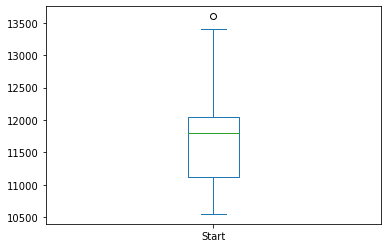

In [41]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
Q1 = df.Start.quantile(.25)
Q3 = df.Start.quantile(.75)
IQR = Q3 - Q1
uw_check = Q3 + 1.5 * IQR
lw_check = Q1 - 1.5 * IQR
df.Start.plot(kind='box')
df.Start.loc[(df.Close > uw_check)|(df.Close < lw_check)]

#### pandas 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있다.
- 선 그래프: df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림
- 막대 그래프: df.plot(kind='bar'), df.plot(kind='barh', stacked=True, alpha=0.8) alpha는 농도를 뜻함
- 히스토그램: df.plot(kind='hist')
- 산점도: df.plot(x='',y='',kind='scatter') 상관관계를 볼 때 주로 사용
- 박스 플롯: df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram: plt.hist(x, bins=)
- time plot: plt.plot(x,y)
- plt.bar(x,y,color='')
- scatter plot: plt.scatter(x,y)
- marker: https://wikidocs.net/92083

#### seaborn
- sns.distplot(data, bins=,color=,kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.joinplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False) regression..

[과제] df_ep 데이터 프레임으로 다음을 수행하세요.
- 선 그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

<AxesSubplot:>

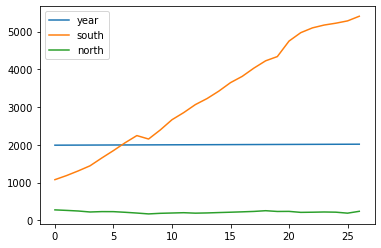

In [45]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.plot()

<AxesSubplot:>

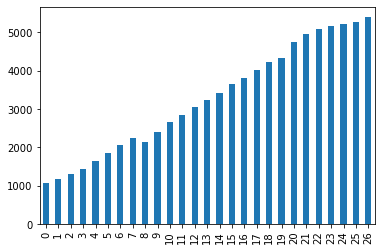

In [46]:
df_ep.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

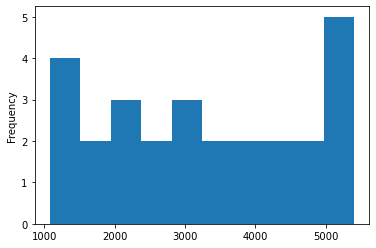

In [47]:
df_ep.south.plot(kind='hist')

<AxesSubplot:>

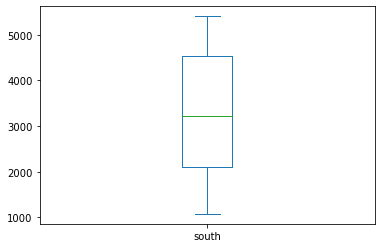

In [48]:
df_ep.south.plot(kind='box')

In [ ]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요(5개 이상)

In [5]:
import pandas as pd
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx')
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<AxesSubplot:xlabel='cylinders'>

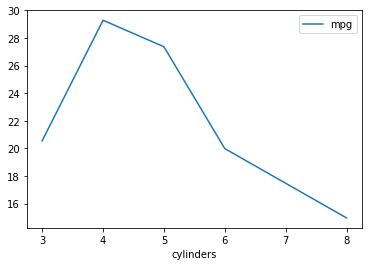

In [58]:
# cylinder 개수에 대한 mpg 
a = df_auto.pivot_table(values='mpg',index='cylinders',aggfunc='mean')
a.plot()

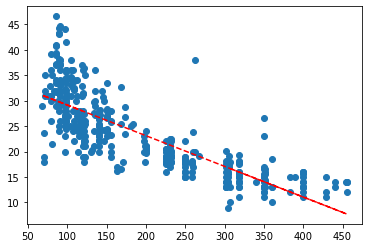

In [22]:
# mpg와 displacement 관계를 확인
plt.scatter(df_auto.displacement,df_auto.mpg)
x = df_auto.displacement
y = df_auto.mpg
z = np.polyfit(x, y, 1) # 최적의 2차 함수의 절편과 계수를 찾아줌
p = np.poly1d(z) # 찾은 최적의 절편과 계수를 이용해 다항식을 구성
plt.plot(x,p(x),"r--") # x와 찾은 함수를 빨간 점선으로 그려줌. 
plt.show()
# 배기량이 높을 수록 연비가 감소하는 경향을 보임. 
# 여러 선이 나오는 것은 동일한 mpg에 대한 처리인 것으로 추정

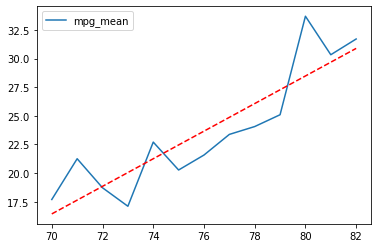

In [21]:
# modelyear와 mpg 간 관계 확인
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
arr = np.zeros((13,1))
df_year_mpg = pd.DataFrame(arr,columns=['mpg_mean'])
df_year_mpg

modelyear = df_auto['model year'].unique()
mpg_mean = []
for i in modelyear: mpg_mean.append(df_auto.mpg.loc[df_auto['model year'] == i].mean())
df_year_mpg.set_index(modelyear,inplace=True)
df_year_mpg.mpg_mean = mpg_mean

df_year_mpg.plot()
x = df_year_mpg.index
y = df_year_mpg.mpg_mean

z = np.polyfit(x, y, 1)   # 최적의 n차 함수의 절편과 계수를 찾아줌
p = np.poly1d(z)          # 찾은 최적의 절편과 계수를 이용해 다항식을 구성
plt.plot(x,p(x),"r--")    # x와 찾은 함수를 빨간 점선으로 그려줌. 
plt.show()

# 연식이 최근 것일 수록 mpg(연비)가 좋아진다.

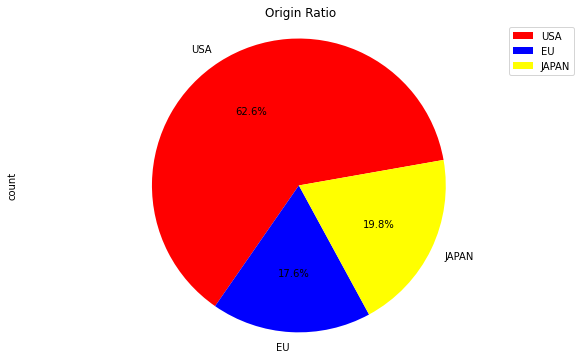

In [13]:
# origin의 빈도 시각화
df_origin = pd.DataFrame()
df_origin['count'] = df_auto.groupby('origin').size()
df_origin.index = ['USA','EU','JAPAN']
df_origin['count'].plot(kind='pie',
                        figsize=(10,6),
                        startangle=10,
                        colors=['red','blue','yellow'],
                        autopct='%.1f%%')
plt.title('Origin Ratio')
plt.axis("equal")
plt.legend(labels=df_origin.index,loc='best')
plt.show()

# origin 

<AxesSubplot:xlabel='origin'>

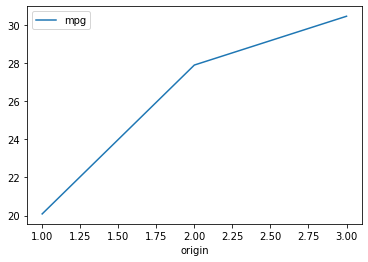

In [25]:
# origin별 mpg 평균을 시각화
df_auto.pivot_table(values='mpg',index='origin', aggfunc='mean').plot()
# 미국, 유럽, 일본 순으로 연비가 좋지 않다..?

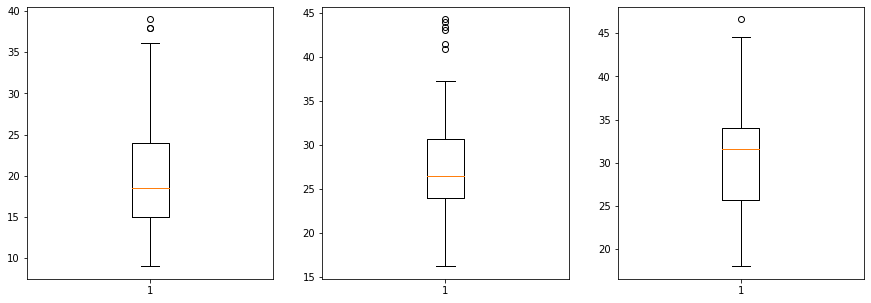

In [26]:
# ortgin별 mpg의 이상치들 확인
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(x=df_auto[df_auto['origin'] == 1]["mpg"])
ax2.boxplot(x=df_auto[df_auto['origin'] == 2]["mpg"])
ax3.boxplot(x=df_auto[df_auto['origin'] == 3]["mpg"])

plt.show()
# 당시 미국과 유럽의 차는 특정 차에 대해서만 연비가 기가 막히게 좋은데 반해, 일본 차들은 비교적 균등함.

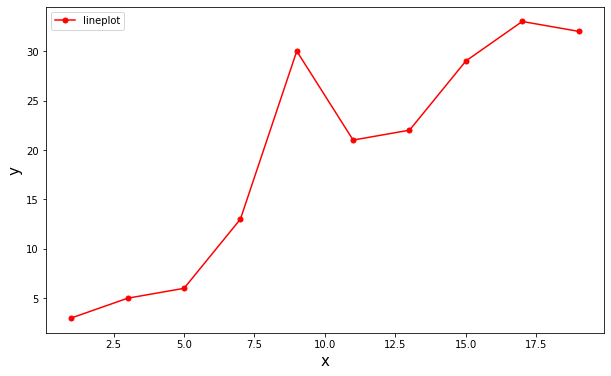

In [84]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,size=50)

plt.figure(figsize=(10,6))
plt.plot(x,y,color='red',marker='o',markersize=5)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot']) # legend => 범례

Text(0.5, 1.0, 'Line Graph')

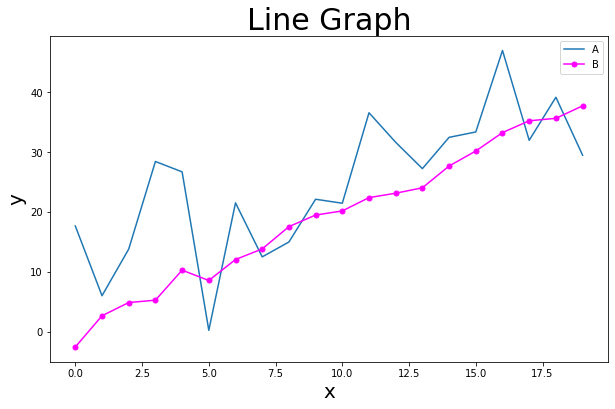

In [88]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o',markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.legend(labels=['A','B'])
plt.title('Line Graph',size=30)

In [102]:
import pandas as pd
df = pd.read_csv('./dataset/movie.csv')
df

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466
5,20180220,6,NEW,20179985,코코,56664400,7967


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

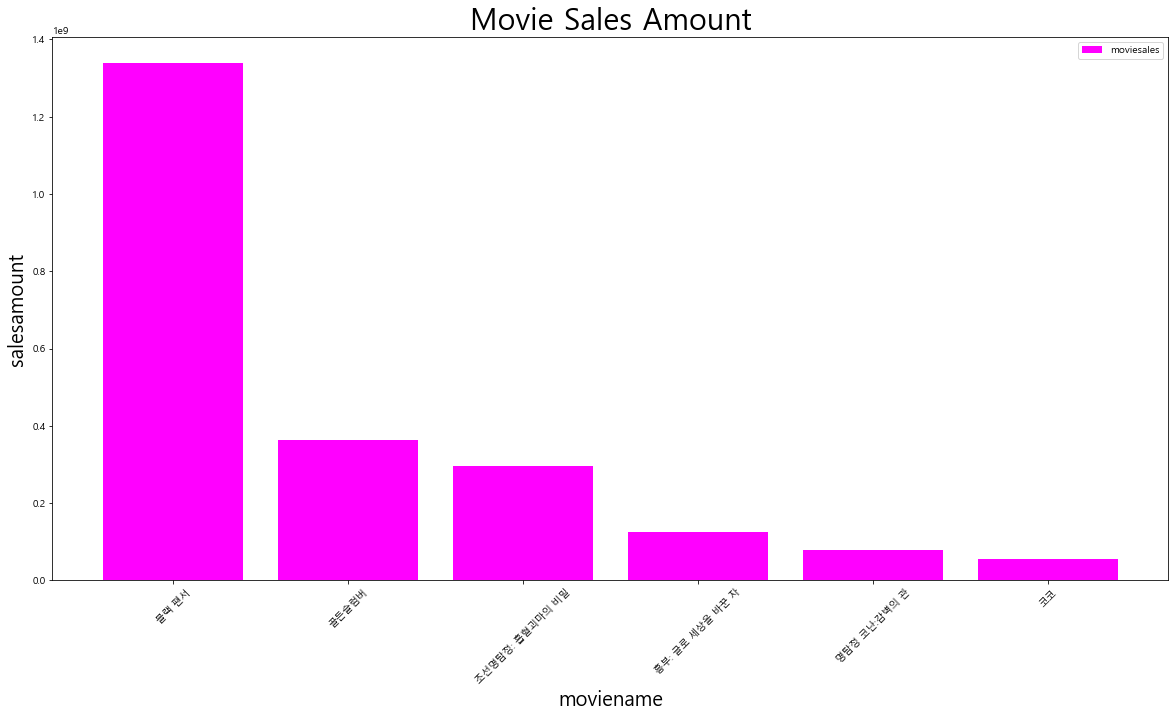

In [116]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 설정
plt.figure(figsize=(20,10))
plt.bar(df.movieNm,df.salesAmt,color='magenta')
plt.xlabel('moviename',size=20)
plt.ylabel('salesamount',size=20)
plt.legend(labels=['moviesales'])
plt.title('Movie Sales Amount',size=30)
plt.xticks(rotation=45)


Text(0, 0.5, 'weight')

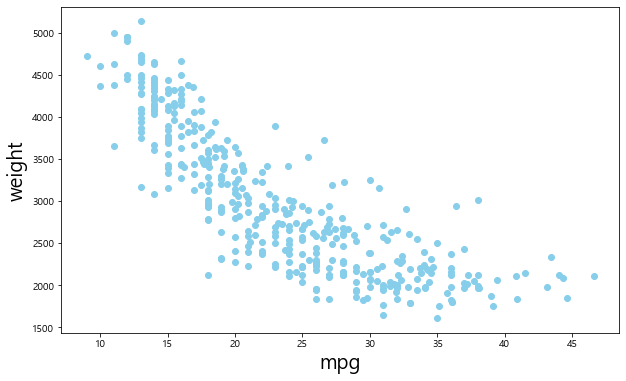

In [119]:
# scatter plot
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')
plt.xlabel('mpg',size=20)
plt.ylabel('weight',size=20)

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

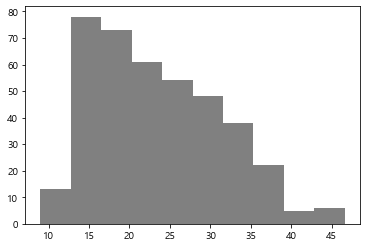

In [127]:
# histogram
plt.hist(x,bins=10,color='gray')

AttributeError: 'int' object has no attribute 'cumsum'

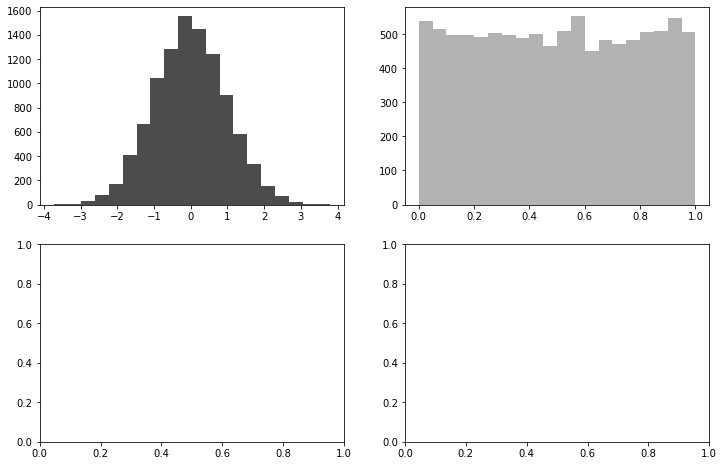

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,8))
# figure가 2 x 2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
np.random.seed(0)
ax1.hist(np.random.randn(10000),bins=20,color='k',alpha=0.7)
ax2.hist(np.random.rand(10000),bins=20,color='k',alpha=0.3)
ax3.plot(np.random.randint(50),np.random.randint(50).cumsum(),kind='bar')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

(array([1.000e+00, 3.000e+00, 3.000e+00, 2.300e+01, 7.100e+01, 2.180e+02,
        4.820e+02, 8.420e+02, 1.294e+03, 1.536e+03, 1.658e+03, 1.517e+03,
        1.108e+03, 6.700e+02, 3.370e+02, 1.620e+02, 5.000e+01, 1.900e+01,
        4.000e+00, 2.000e+00]),
 array([-4.42376468, -3.99375732, -3.56374996, -3.1337426 , -2.70373524,
        -2.27372788, -1.84372052, -1.41371316, -0.9837058 , -0.55369844,
        -0.12369108,  0.30631628,  0.73632364,  1.166331  ,  1.59633836,
         2.02634572,  2.45635308,  2.88636044,  3.31636781,  3.74637517,
         4.17638253]),
 <BarContainer object of 20 artists>)

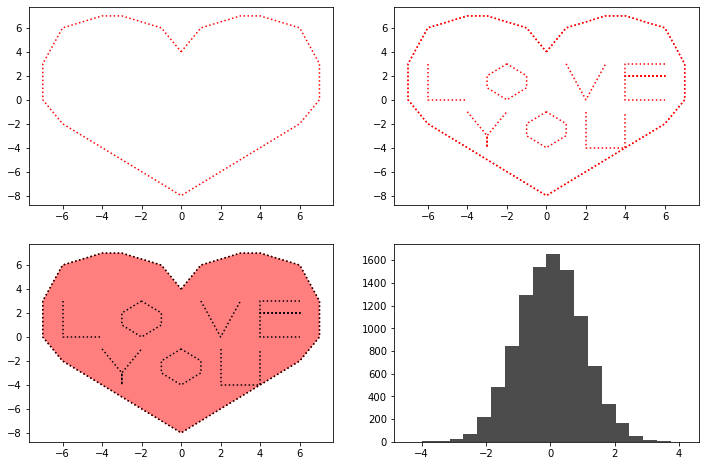

In [5]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
y = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4]

def heart(axis):
    axis.plot(x,y,'red',linestyle=':')

def loveu(axis,color):
    x1 = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
    y1 = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4] ; axis.plot(x1,y1,color,linestyle=':')
    x2 = [-6,-6,-4]
    y2 = [3,0,0] ; axis.plot(x2,y2,color,linestyle=':')
    x3 = [-2,-3,-3,-2,-1,-1,-2]
    y3 = [3,2,1,0,1,2,3] ; axis.plot(x3,y3,color,linestyle=':')
    x4 = [1,2,3]
    y4 = [3,0,3] ; axis.plot(x4,y4,color,linestyle=':')
    x5 = [6,4,4,6,4,4,6]
    y5 = [3,3,2,2,2,0,0] ; axis.plot(x5,y5,color,linestyle=':')
    x6 = [-4,-3,-3,-3,-2]
    y6 = [-1,-3,-4,-3,-1] ; axis.plot(x6,y6,color,linestyle=':')
    x7 = [0,-1,-1,0,1,1,0]
    y7 = [-1,-2,-3,-4,-3,-2,-1] ; axis.plot(x7,y7,color,linestyle=':')
    x8 = [2,2,4,4]
    y8 = [-1,-4,-4,-1] ; axis.plot(x8,y8,color,linestyle=':')

heart(ax1)
heart(ax2)
loveu(ax2,'red')
heart(ax3)
loveu(ax3,'black')
ax3.fill(x,y,'r',alpha=0.5)
ax4.hist(np.random.randn(10000),bins=20,color='k',alpha=0.7)

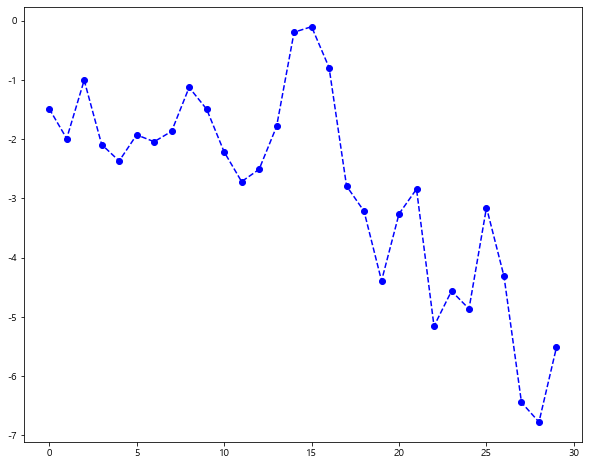

In [148]:
from numpy.random import randn
plt.figure(figsize=(10,8))
plt.plot(randn(30).cumsum(),linestyle='dashed',color='b',marker='o')

In [149]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [150]:
# Q. t3에서 age 열을 범주화한 후 age_cat 열을 추가하세요.
def catage(age):
    cat = ''
    if age<3: cat='Baby'
    elif age<10: cat='Child'
    elif age<20: cat='Teen'
    elif age<30: cat='20s'
    elif age<40: cat='30s'
    elif age<50: cat='40s'
    elif age<60: cat='50s'
    else: cat='Elder'
    return cat
t3['age_cat'] = t3.age.apply(lambda x:catage(x))
t3[['age','age_cat']].head()

,age,age_cat
0,29.00,20s
1,0.92,Baby
2,2.00,Baby
3,30.00,30s
4,25.00,20s


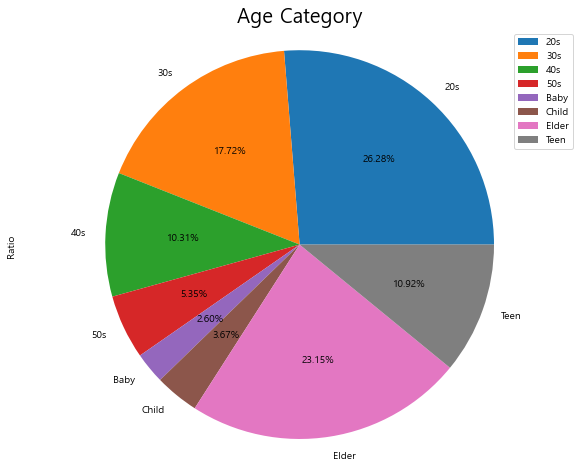

In [159]:
t3['Ratio'] = 1
df_age_cat = t3.groupby('age_cat').sum()
df_age_cat.head()
df_age_cat.Ratio.plot(kind='pie',
                    figsize=(10,8),
                    autopct='%.2f%%',
                    startangle=0)
plt.title('Age Category',size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')

In [25]:
# 물고기 종류별 몸길이 데이터
import seaborn as sns
import pandas as pd
df = pd.read_csv('./dataset/4_fm2.csv')
df

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


<AxesSubplot:xlabel='length', ylabel='Count'>

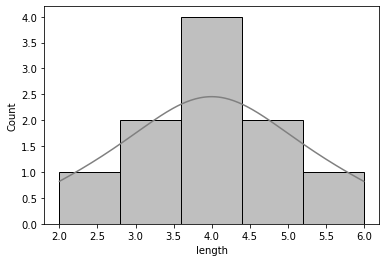

In [26]:
length_a = df.query('species=="A"')['length']
length_b = df.query('species=="B"')['length']
sns.histplot(length_a,color='gray',kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

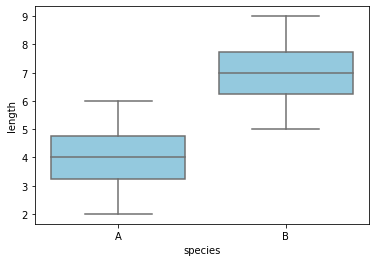

In [30]:
sns.boxplot(x='species',y='length',data=df, color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

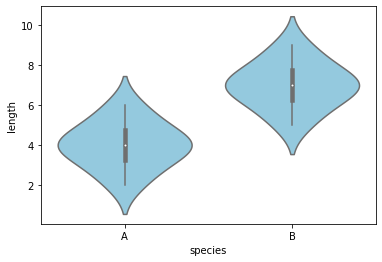

In [32]:
# 바이올린 플룻
sns.violinplot(x='species',y='length',data=df,color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

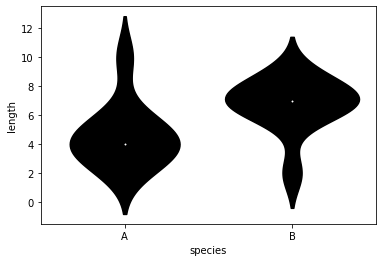

In [35]:
# [과제] df1으로 박스플롯을 그려보세요.
df1 = df.copy()
df1.iloc[5,1]=10
df1.iloc[10,1]=2
sns.violinplot(x='species',y='length',data=df1,color='black')

In [ ]:
# [과제] df1으로 박스플롯을 확인한 후 이상치를 구하세요.
def getoutlier(column):
    Q1 = df1.column.quantile(.25)
    Q3 = df.column.describe()['75%']
    IQR = Q3 - Q1
    uw_check = Q3 + 1.5 * IQR 
# print()
# print(df.Close.sort_values(ascending=False)[:5])
# df.Close.loc[(df.Close > Q3 + 1.5 * IQR)|(df.Close < Q1 - 1.5 * IQR)]

In [38]:
import warnings
warnings.filterwarnings('ignore')
cov_df = pd.read_csv('dataset/4_cov.csv')
cov_df

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


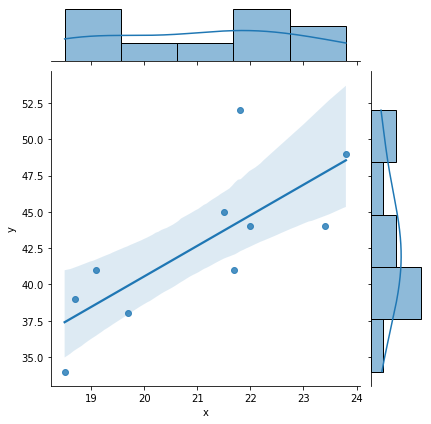

In [39]:
sns.jointplot(cov_df.x,cov_df.y,kind='reg')

In [40]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


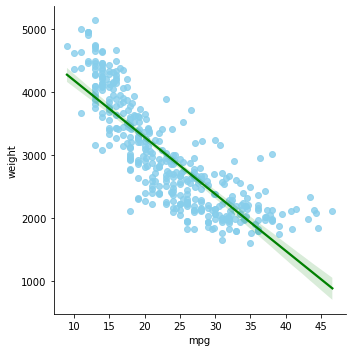

In [41]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

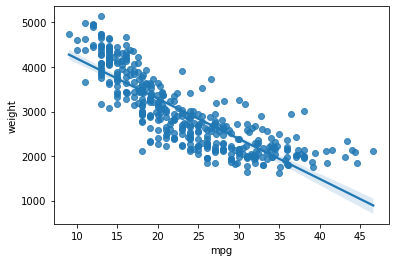

In [43]:
sns.regplot(x='mpg',y='weight',data=df_auto,fit_reg=True)

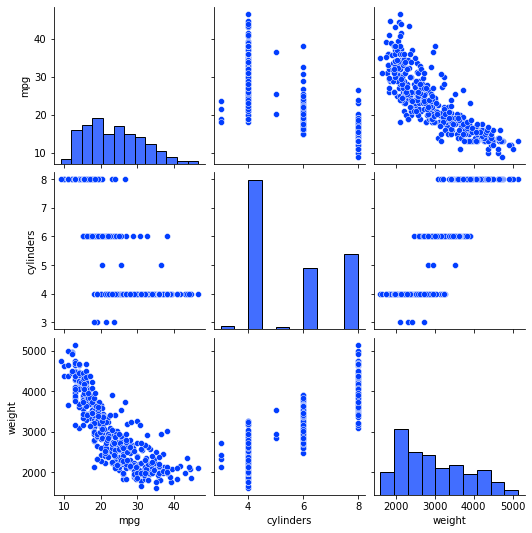

In [49]:
sns.set_palette('bright')
a = df_auto[['mpg','cylinders','weight']]
sns.pairplot(a)

Text(0.5, 1.0, 'Heatmap of the Dataset')

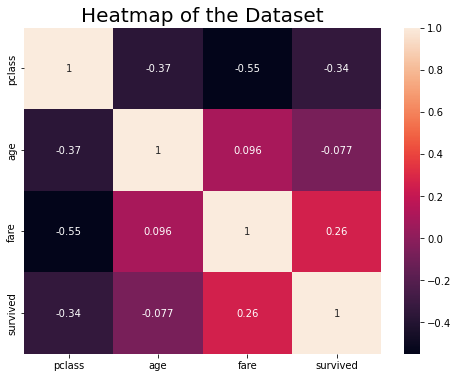

In [55]:
import matplotlib.pyplot as plt
tdf = sns.load_dataset('titanic')
plt.figure(figsize=(8,6))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [56]:
table = tdf.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

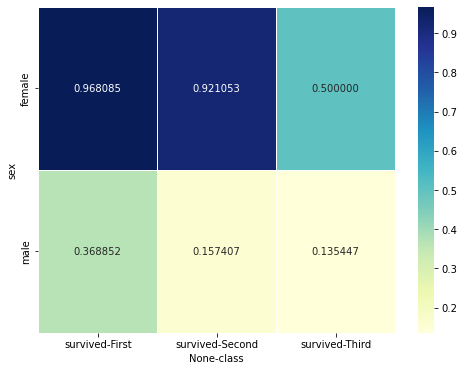

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(table,
            annot=True,
            fmt='f',
            cmap='YlGnBu',
            linewidth=.5,
            cbar=True)